In [1]:
# Initial Imports:
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#import plotly.express as px
#import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Manipulation:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# For Decision Tree:
from sklearn import tree

# For Random Forest:
from sklearn.ensemble import RandomForestClassifier

# For SVM:
from sklearn import svm
from sklearn.svm import SVC
from matplotlib import style
style.use('ggplot')

# For Gradient Boosted Trees:
from sklearn.ensemble import GradientBoostingClassifier

# For evaluation:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Data Pre-Processing:

In [2]:
# Read in 1st CSV/Season:
season_2014_2015_csvpath = Path(r'C:\Users\Shakeer\OneDrive\Documents\NBA Stats - Capstone\Players Stats Per36 14-15.csv')
season_2014_2015_df = pd.read_csv(season_2014_2015_csvpath, encoding="ISO-8859-1")

# Read in 2nd CSV/Season:
season_2015_2016_csvpath = Path(r'C:\Users\Shakeer\OneDrive\Documents\NBA Stats - Capstone\Players Stats Per36 15-16.csv')
season_2015_2016_df = pd.read_csv(season_2015_2016_csvpath, encoding="ISO-8859-1")

# Read in 3rd CSV/Season:
season_2016_2017_csvpath = Path(r'C:\Users\Shakeer\OneDrive\Documents\NBA Stats - Capstone\Players Stats Per36 16-17.csv')
season_2016_2017_df = pd.read_csv(season_2016_2017_csvpath, encoding="ISO-8859-1")

# Read in 4th CSV/Season:
season_2017_2018_csvpath = Path(r'C:\Users\Shakeer\OneDrive\Documents\NBA Stats - Capstone\Players Stats Per36 17-18.csv')
season_2017_2018_df = pd.read_csv(season_2017_2018_csvpath, encoding="ISO-8859-1")

# Read in 5th CSV/Season:
season_2018_2019_csvpath = Path(r'C:\Users\Shakeer\OneDrive\Documents\NBA Stats - Capstone\Players Stats Per36 18-19.csv')
season_2018_2019_df = pd.read_csv(season_2018_2019_csvpath, encoding="ISO-8859-1")

# Read in 6th CSVCSV/Season:
season_2019_2020_csvpath = Path(r'C:\Users\Shakeer\OneDrive\Documents\NBA Stats - Capstone\Players Stats Per36 19-20.csv')
season_2019_2020_df = pd.read_csv(season_2019_2020_csvpath, encoding="ISO-8859-1")

# Read in 7th CSV/Season:
season_2020_2021_csvpath = Path(r'C:\Users\Shakeer\OneDrive\Documents\NBA Stats - Capstone\Players Stats Per36 20-21.csv')
season_2020_2021_df = pd.read_csv(season_2020_2021_csvpath, encoding="ISO-8859-1")

# Read in 8th CSV/Season:
season_2021_2022_csvpath = Path(r'C:\Users\Shakeer\OneDrive\Documents\NBA Stats - Capstone\Players Stats Per36 21-22.csv')
season_2021_2022_df = pd.read_csv(season_2021_2022_csvpath, encoding="ISO-8859-1")

# Concatenate all seasons into one DataFrame:
original_df = pd.concat([season_2014_2015_df, season_2015_2016_df, season_2016_2017_df, season_2017_2018_df, season_2018_2019_df, season_2019_2020_df, season_2020_2021_df, season_2021_2022_df])

# Set Pandas option to show all DataFrame columns (without showing truncated ... in middle):
pd.set_option('display.max_rows', None, 'display.max_columns', None)

# Preview original DataFrame:
original_df.head()

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%   3P  3PA  \
0     Quincy Acy  PF   24  NYK  68  22  1287  4.3   9.3  0.459  0.5  1.7   
1   Jordan Adams  SG   20  MEM  30   0   248  5.1  12.5  0.407  1.5  3.6   
2   Steven Adams   C   21  OKC  70  67  1771  4.4   8.1  0.544  0.0  0.0   
3    Jeff Adrien  PF   28  MIN  17   0   215  3.2   7.4  0.432  0.0  0.0   
4  Arron Afflalo  SG   29  TOT  78  72  2502  5.4  12.7  0.424  1.7  4.8   

     3P%   2P  2PA    2P%   FT  FTA    FT%  ORB  DRB   TRB  AST  STL  BLK  \
0  0.300  3.7  7.6  0.494  2.1  2.7  0.784  2.2  6.2   8.4  1.9  0.8  0.6   
1  0.400  3.6  8.9  0.410  2.0  3.3  0.609  1.3  2.8   4.1  2.3  2.3  1.0   
2  0.000  4.4  8.1  0.547  2.1  4.2  0.502  4.0  6.6  10.6  1.3  0.8  1.7   
3    NaN  3.2  7.4  0.432  3.7  6.4  0.579  3.9  9.0  12.9  2.5  0.7  1.5   
4  0.354  3.7  7.9  0.466  2.4  2.8  0.843  0.4  3.2   3.6  1.9  0.6  0.1   

   TOV   PF   PTS  
0  1.7  4.1  11.1  
1  2.0  3.5  13.6  
2  2.0  4.5  10.9  
3  1.5  5.0  10.0  
4  1.7  2.4  14.9

In [3]:
# Create pre-conversion "shape" variable:
shape_pre_conversion = original_df.shape

In [4]:
# Filter DataFrame to only include rows with at least 820 Minutes Played (10 min/game * 82/games)
# Rows containing players with less than 820 minutes played would unfairly skew the data.
# For instance, if a player plays only 1 minute for a team and scores 2 points, his Points Per 36 Minutes would be 72;
# clearly not a fair representation.

original_df = original_df[original_df.MP >= 820]
original_df.head()

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%   3P  3PA  \
0     Quincy Acy  PF   24  NYK  68  22  1287  4.3   9.3  0.459  0.5  1.7   
2   Steven Adams   C   21  OKC  70  67  1771  4.4   8.1  0.544  0.0  0.0   
4  Arron Afflalo  SG   29  TOT  78  72  2502  5.4  12.7  0.424  1.7  4.8   
5  Arron Afflalo  SG   29  DEN  53  53  1750  5.8  13.5  0.428  1.7  5.0   
7  Alexis Ajinça   C   26  NOP  68   8   957  6.8  12.4  0.550  0.0  0.0   

     3P%   2P   2PA    2P%   FT  FTA    FT%  ORB  DRB   TRB  AST  STL  BLK  \
0  0.300  3.7   7.6  0.494  2.1  2.7  0.784  2.2  6.2   8.4  1.9  0.8  0.6   
2  0.000  4.4   8.1  0.547  2.1  4.2  0.502  4.0  6.6  10.6  1.3  0.8  1.7   
4  0.354  3.7   7.9  0.466  2.4  2.8  0.843  0.4  3.2   3.6  1.9  0.6  0.1   
5  0.337  4.1   8.5  0.481  2.6  3.1  0.841  0.4  3.3   3.7  2.1  0.7  0.1   
7    NaN  6.8  12.4  0.550  3.0  3.7  0.818  3.9  7.9  11.8  1.8  0.8  1.9   

   TOV   PF   PTS  
0  1.7  4.1  11.1  
2  2.0  4.5  10.9  
4  1.7  2.4  14.9  
5  1.7  2.2  15.9  
7  2.6  5.7  16.7

#### Note that numbers represent stats/36 min, not stats/game. This ensures that the averages are more on scale. By this, I mean that the stats for a player who has a small number of minutes/game (but still made the cut because they played enough total minutes) does not skew the data. By scaling all the statistics to be per minute, the players' statistics are a fairer representation of the role they play on the team.

In [5]:
# Slice original dataframe into new dataframe with relevant columns, while appropriately ordering columns:
df = original_df[['PTS', 'TRB', 'ORB', 'AST', 'STL', 'BLK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'TOV', 'Pos']]

# Drop nulls:
df = df.dropna()

# Convert mixed positions, like "C-PF" and "PF-SF" into one of the 5 main basketball positions:
df = df.replace("C-PF","C")
df = df.replace("PF-SF","PF")
df = df.replace("SF-SG","SF")
df = df.replace("SG-PG","SG")
df = df.replace("PF-C","PF")
df = df.replace("PG-SG","PG")
df = df.replace("SF-PF","SF")
df = df.replace("SG-SF","SG")
df = df.replace("SG-PF","SG")
df = df.replace("SF-C","SF")

# Round all numerical columns to show 2 decimals max:
df = df.round({'PTS': 2})
df = df.round({'TRB': 2})
df = df.round({'ORB': 2})
df = df.round({'AST': 2})
df = df.round({'STL': 2})
df = df.round({'BLK': 2})
df = df.round({'FG': 2})
df = df.round({'FGA': 2})
df = df.round({'FG%': 2})
df = df.round({'3P': 2})
df = df.round({'3PA': 2})
df = df.round({'3P%': 2})
df = df.round({'2P': 2})
df = df.round({'2PA': 2})
df = df.round({'2P%': 2})
df = df.round({'FT': 2})
df = df.round({'FTA': 2})
df = df.round({'FT%': 2})
df = df.round({'PF': 2})
df = df.round({'TOV': 2})

# Confirm new DataFrame:
df.head()

PTS   TRB  ORB  AST  STL  BLK   FG   FGA   FG%   3P  3PA   3P%   2P  \
0   11.1   8.4  2.2  1.9  0.8  0.6  4.3   9.3  0.46  0.5  1.7  0.30  3.7   
2   10.9  10.6  4.0  1.3  0.8  1.7  4.4   8.1  0.54  0.0  0.0  0.00  4.4   
4   14.9   3.6  0.4  1.9  0.6  0.1  5.4  12.7  0.42  1.7  4.8  0.35  3.7   
5   15.9   3.7  0.4  2.1  0.7  0.1  5.8  13.5  0.43  1.7  5.0  0.34  4.1   
10  23.8  10.4  2.5  1.8  0.7  1.0  9.4  20.3  0.47  0.5  1.5  0.35  8.9   

     2PA   2P%   FT  FTA   FT%   PF  TOV Pos  
0    7.6  0.49  2.1  2.7  0.78  4.1  1.7  PF  
2    8.1  0.55  2.1  4.2  0.50  4.5  2.0   C  
4    7.9  0.47  2.4  2.8  0.84  2.4  1.7  SG  
5    8.5  0.48  2.6  3.1  0.84  2.2  1.7  SG  
10  18.8  0.48  4.4  5.2  0.84  1.8  1.7  PF

In [6]:
shape_post_conversion = df.shape

print(f'Shape Pre-Conversion: {shape_pre_conversion}')
print(f'Shape Post-Conversion: {shape_post_conversion}')

Shape Pre-Conversion: (5364, 28)
Shape Post-Conversion: (2532, 21)


In [7]:
# Check how many of each position in y-dataset:
df.loc[:, 'Pos'].value_counts()

SG    607
PG    535
PF    530
SF    464
C     396
Name: Pos, dtype: int64

# Data Visualization:

In [8]:
# Groupby "position" and calculate average of each column, per position:
summary_df = df.groupby('Pos').mean()
summary_df.head()

PTS        TRB       ORB       AST       STL       BLK        FG  \
Pos                                                                           
C    16.397980  10.792929  3.226010  2.508333  0.973990  1.503535  6.452778   
PF   15.356604   7.862642  1.860377  2.513962  1.025660  0.841132  5.759811   
PG   16.518879   4.471963  0.757944  6.283178  1.356449  0.338131  5.978692   
SF   14.909052   5.658190  1.118966  2.633836  1.190302  0.548707  5.398707   
SG   16.089951   4.383690  0.750247  3.278089  1.154366  0.406425  5.800824   

           FGA       FG%        3P       3PA       3P%        2P        2PA  \
Pos                                                                           
C    12.179798  0.537424  0.618182  1.788384  0.242753  5.833586  10.391667   
PF   12.417170  0.462038  1.471887  4.152075  0.326679  4.292642   8.265283   
PG   13.748972  0.432804  1.760935  4.970280  0.342542  4.213271   8.782804   
SF   12.138362  0.443190  1.799569  5.027802  0.349634  3.596552   7.114871   
SG   13.475124  0.429605  2.197529  6.016969  0.358913  3.600329   7.459308   

          2P%        FT       FTA       FT%        PF       TOV  
Pos                                                              
C    0.567045  2.868939  4.048232  0.711212  3.838131  2.083333  
PF   0.516755  2.357170  3.144340  0.745736  3.173396  1.776415  
PG   0.476879  2.800935  3.476449  0.795664  2.665981  2.583551  
SF   0.507004  2.314655  2.945259  0.774806  2.820043  1.664655  
SG   0.483394  2.288797  2.845799  0.798402  2.633608  1.850412

#### We can glean useful information from the above chart. We see that in terms of, say, PTS, there is not much difference position-by-position: each averages about 15 points/36 minutes. However we see serious differences in a few categories, which are the ones we would expect; most namely, TRB (Total Rebounds) and AST (Assists). While point guards take the ball up the court and distribute the ball, leading to assists (PG's average 6.3 assists while C's average 2.5 assists), centers are taller and have a more rebound-heavy responsibility (C's average 10.8 rebounds while PG's average 4.5 rebounds). This gives a good idea about what to expect in the model, especially in terms of what the model deems to be the most important features that help determine a player's position.

<AxesSubplot:title={'center':'Bar Chart of Main Stats across all 5 Positions'}, xlabel='Pos'>

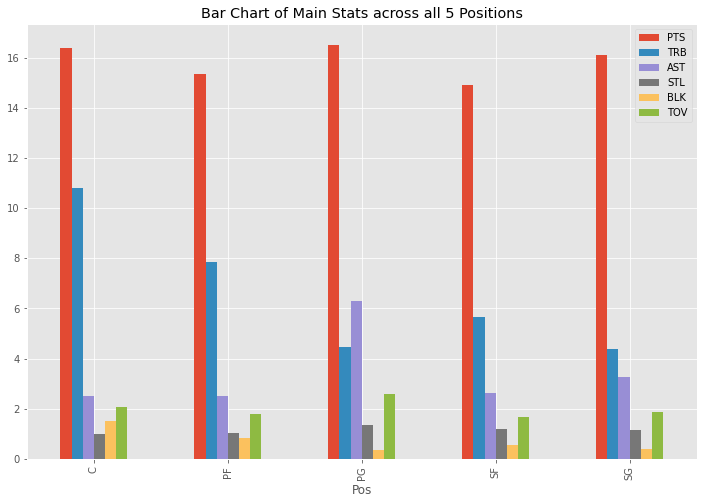

In [9]:
# Visualization 1 of 2:
bar_chart_df = summary_df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']]
bar_chart_df.plot(kind='bar', figsize = (12, 8), title='Bar Chart of Main Stats across all 5 Positions')

#### This simple bar plot shows the six main basketball statistics - Points, Rebounds, Assists, Steals, Blocks, and Turnovers - and how they are distributed among the five positions. As mentioned above, points/36 minutes do not differ that greatly position-by-position; rebounds and assists, however, vary greatly. We can also see in yellow that centers average signficantly more blocks than other positions - blocks in general are hard to come by, so while centers average only 1.5 blocks/36 minutes, point guards average only .34 blocks/36 minutes, meaning in this particular dataset, centers average 341% more blocks/36 minutes relative to point guards. This feature could potentially be deemed one of the more important ones by the upcoming models.

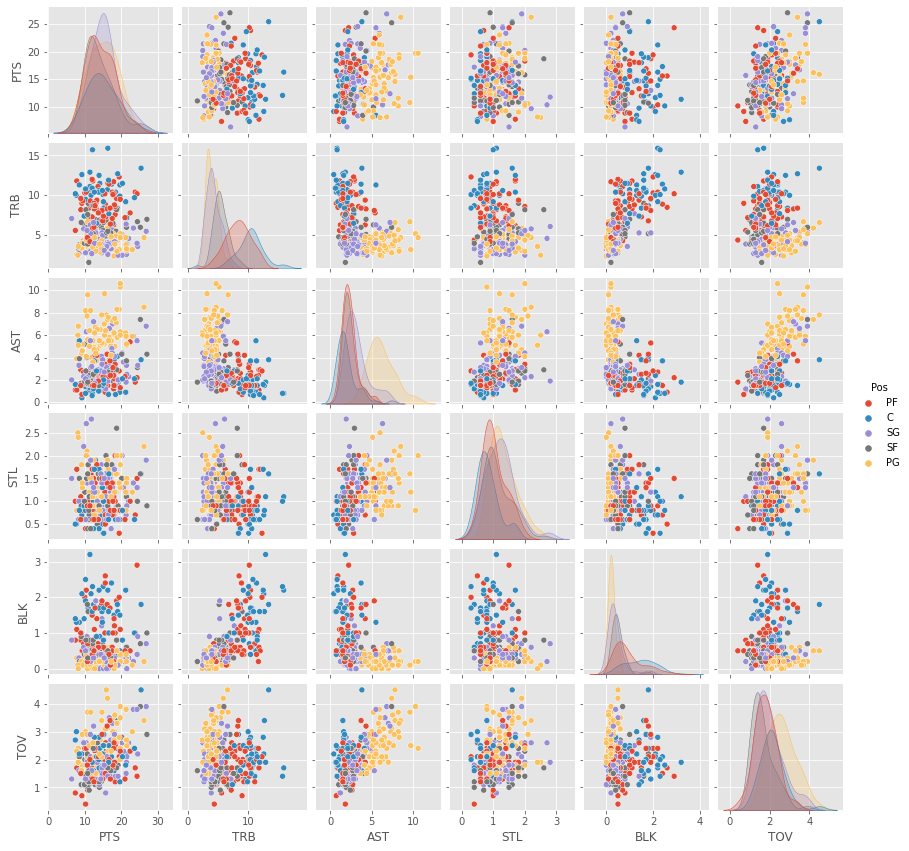

In [10]:
# Visualization 2 of 2:
sns_df = df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV','Pos']].head(300)
sns_df = sns_df.reset_index()
sns_df = sns_df.drop('index', axis=1)

sns_plot = sns.pairplot(sns_df, hue='Pos', size=2)
sns_plot

In [145]:
df_anova = df.copy()

df_anova['Pos'] = np.where((df_anova.Pos == 'PG'), 1 ,
                           (np.where((df_anova.Pos == 'SG'), 2 ,
                           (np.where((df_anova.Pos == 'SF'), 3 ,
                           (np.where((df_anova.Pos == 'PF'), 4 , 5)))))))
df_anova.head()

from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df_anova):
    df_anova = df_anova.dropna()._get_numeric_data()
    dfcols_anova = pd.DataFrame(columns=df_anova.columns)
    pvalues = dfcols_anova.transpose().join(dfcols_anova, how='outer')
    for r in df_anova.columns:
        for c in df_anova.columns:
            pvalues[r][c] = round(pearsonr(df_anova[r], df_anova[c])[1], 4)
    return pvalues

calculate_pvalues(df_anova)

df_anova.to_csv('df_anova.csv', index = False)

df2 = df[['TRB', 'AST', 'STL', 'BLK', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'Pos' ]]
df2.head()

TRB  AST  STL  BLK   2P%   FT  FTA   FT%   PF Pos
0    8.4  1.9  0.8  0.6  0.49  2.1  2.7  0.78  4.1  PF
2   10.6  1.3  0.8  1.7  0.55  2.1  4.2  0.50  4.5   C
4    3.6  1.9  0.6  0.1  0.47  2.4  2.8  0.84  2.4  SG
5    3.7  2.1  0.7  0.1  0.48  2.6  3.1  0.84  2.2  SG
10  10.4  1.8  0.7  1.0  0.48  4.4  5.2  0.84  1.8  PF

#### Here we see scatter plots of all possible x/y-axis combinations. The first thing I notice is the general positive correlation in these graphs - meaning, as the x-axis values increase, so do the y-values. This makes sense to me, as it tells me that the better a player is at one particular category, chances are, they are also good at other statistical categories (good players don't just do one thing well). However, with TRB and AST, it appears the opposite is true: generally speaking, the more assists a player has, or the more rebounds, the less of the other stat they will have.
#### The diagonal gives us insight into the distribution of each variable, broken down by position - it helps visualize the ranges in values by position. Looking at the TRB vs. TRB intersection, for example, we see that centers have a longer tail than other positions, while for the AST metric, point guards have a longer tail than other positions - the longer tail indicates a wider distribution, a larger range of values). While most categories have varied distributions, the PTS distribution remains relatively steady across all five positions.

# Decision Tree (1 of 3):

### This model will use all features, and will not use PCA transformation on X-data.

In [147]:
# New clean dataframe:
df_decision_tree1 = df.copy()

# Set X (features) and y (target):
X = df_decision_tree1.drop('Pos', axis=1)
y = df_decision_tree1.loc[:, 'Pos']

# Manually encode y-labels to make them more meaningful for the confusion matrix during evaluation:
position_dictionary = {
    "PG": 1,
    "SG": 2,
    "SF": 3,
    "PF": 4,
    "C": 5}

y = y.map(position_dictionary).values.reshape(-1,1)

# Split X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1899, 20)
y_train: (1899, 1)
X_test: (633, 20)
y_test: (633, 1)


In [13]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Create, fit and predict Decision Tree Model:
dt1_model = tree.DecisionTreeClassifier(random_state=1)
dt1_model = dt1_model.fit(X_train_scaled, y_train)
predictions = dt1_model.predict(X_test_scaled)

In [15]:
# Print accuracy score:
dt1_accuracy_score = accuracy_score(y_test, predictions)
dt1_accuracy_score

0.5924170616113744

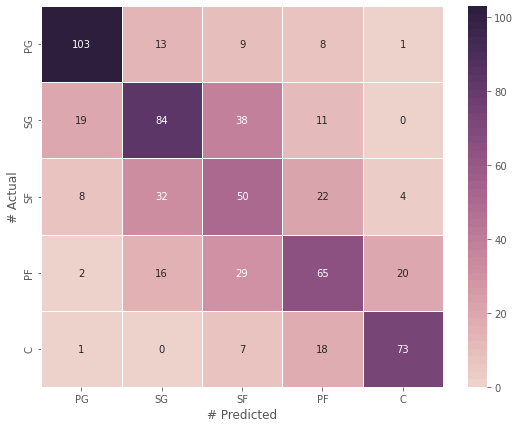

In [16]:
# Define Custom Confusion Matrix function that plots Heatmap of Actuals vs. Predictions:

def confusion_matrix_heatmap(y_test, predictions):
    """This plots the confusion matrix"""
    warnings.filterwarnings('ignore')

    cm = confusion_matrix(y_test, predictions)

    # Plot Heatmap:
    f, ax = plt.subplots(figsize=(9, 7))
    heat_map = sns.heatmap(cm, annot=True, fmt="d", linewidths=1, ax=ax, cmap=sns.cubehelix_palette(50), xticklabels=position_dictionary.keys(), yticklabels=position_dictionary.keys())

    # Set X and Y Labels:
    heat_map.set_xlabel("# Predicted")
    heat_map.set_ylabel("# Actual")
    
# Print confusion matrix:
cm1 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy. We can see in the above, for instance, that out of the 134 point guards included in the Testing Dataset (103+13+9+8+1), the model correctly predicted "point guard" 103 times. 13 times it thought the point guard was a shooting guard, 9 times it thought the point guard was a small forward, 8 times it thought the point guard was a power forward, and 1 time it thought the point guard was a center. That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [17]:
# Print classification report:
dt1_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(dt1_class_report)

              precision    recall  f1-score   support

          PG       0.77      0.77      0.77       134
          SG       0.58      0.55      0.57       152
          SF       0.38      0.43      0.40       116
          PF       0.52      0.49      0.51       132
           C       0.74      0.74      0.74        99

    accuracy                           0.59       633
   macro avg       0.60      0.60      0.60       633
weighted avg       0.60      0.59      0.59       633



### What do these scores mean?
#### Precision: Accuracy of positive predictions: The model positively predicted a position (meaning it said it is this position as opposed to it is NOT that position) at a 60% rate.

#### Recall: Fraction of positives that were correctly identified: The model caught 60% of the positive cases.

#### F1 Score: The percentage of positive predictions correctly predicted: The model correctly predicted 60% of the positive predictions.

#### Support: Number of occurrences in the dataset, AKA, the number of rows in the dataset. This dataset contained 633 rows of data and therefore had a Support score of 633.

In [18]:
# List features ordered by feature importance:
dt1_importances = pd.DataFrame(dt1_model.feature_importances_, index = X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
dt1_importances

Importance
TRB    0.234745
AST    0.187726
ORB    0.072603
BLK    0.044798
FT%    0.043533
PF     0.042900
FG%    0.040563
2P%    0.037831
STL    0.036804
FGA    0.036772
FTA    0.036067
TOV    0.033015
PTS    0.030044
2PA    0.028264
3PA    0.020144
3P%    0.018302
FT     0.014335
FG     0.014257
3P     0.013652
2P     0.013646

#### We can see that Decision Tree 1 deemed TRB, AST, ORB, BLK, FT% and PF to be the 6 most important features that help the model predict positions. It deemed 3PA, 3P%, FT, FG, 3P and 2P to be the least important features. This makes sense - the categories in which average stats differ greatly position-by-position (like TRB and AST) the model deems to be important, while categories in which average stats do not differ greatly position-by-position (like FG and FT) the model deems to be unhelpful toward making predictions.

# Decision Tree (2 of 3):
### This model will use all features, like Decision Tree 1, but will also use PCA transformation of X-data to reduce dataset dimensions.

In [19]:
# New clean dataframe:
df2_decision_tree = df.copy()
df2_decision_tree.head()

PTS   TRB  ORB  AST  STL  BLK   FG   FGA   FG%   3P  3PA   3P%   2P  \
0   11.1   8.4  2.2  1.9  0.8  0.6  4.3   9.3  0.46  0.5  1.7  0.30  3.7   
2   10.9  10.6  4.0  1.3  0.8  1.7  4.4   8.1  0.54  0.0  0.0  0.00  4.4   
4   14.9   3.6  0.4  1.9  0.6  0.1  5.4  12.7  0.42  1.7  4.8  0.35  3.7   
5   15.9   3.7  0.4  2.1  0.7  0.1  5.8  13.5  0.43  1.7  5.0  0.34  4.1   
10  23.8  10.4  2.5  1.8  0.7  1.0  9.4  20.3  0.47  0.5  1.5  0.35  8.9   

     2PA   2P%   FT  FTA   FT%   PF  TOV Pos  
0    7.6  0.49  2.1  2.7  0.78  4.1  1.7  PF  
2    8.1  0.55  2.1  4.2  0.50  4.5  2.0   C  
4    7.9  0.47  2.4  2.8  0.84  2.4  1.7  SG  
5    8.5  0.48  2.6  3.1  0.84  2.2  1.7  SG  
10  18.8  0.48  4.4  5.2  0.84  1.8  1.7  PF

In [20]:
# Set X (features) and y (target):
X = df2_decision_tree.drop('Pos', axis=1)
y = df2_decision_tree.loc[:, 'Pos']

In [21]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    607
PG    535
PF    530
SF    464
C     396
Name: Pos, dtype: int64

In [22]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [23]:
# Split the X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1899, 20)
y_train: (1899, 1)
X_test: (633, 20)
y_test: (633, 1)


In [24]:
# Scale X-data before using PCA to reduce dimensions:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Now, use PCA to reduce dimensions:
pca = PCA(n_components=3)
X_pca = pca.fit(X_train_scaled)

X_train_pca = X_pca.transform(X_train_scaled)
X_test_pca = X_pca.transform(X_test_scaled)

X_train_pca_df = pd.DataFrame(data = X_train_pca, columns = ["PC1", "PC2", "PC3"])
X_test_pca_df = pd.DataFrame(data = X_test_pca, columns = ["PC1", "PC2", "PC3"])

X_train_pca_df.head()

PC1       PC2       PC3
0  1.405757 -1.158506  0.381929
1  1.153175 -1.581844  0.179647
2 -3.183667  0.483626 -1.267886
3 -3.855896  1.146708 -0.152094
4  1.311024 -1.582752  0.499617

In [26]:
pca.explained_variance_ratio_

array([0.33354838, 0.28291195, 0.09040357])

#### According to the above Explained Variance Ratio, we have 70% of the information captured in this model.

In [27]:
# Create, fit, and predict Decision Tree 2 Model:
dt2_model = tree.DecisionTreeClassifier(random_state=1)
dt2_model = dt2_model.fit(X_train_pca, y_train)
predictions = dt2_model.predict(X_test_pca)

In [28]:
# Print accuracy score:
dt2_accuracy_score = accuracy_score(y_test, predictions)
dt2_accuracy_score

0.48183254344391785

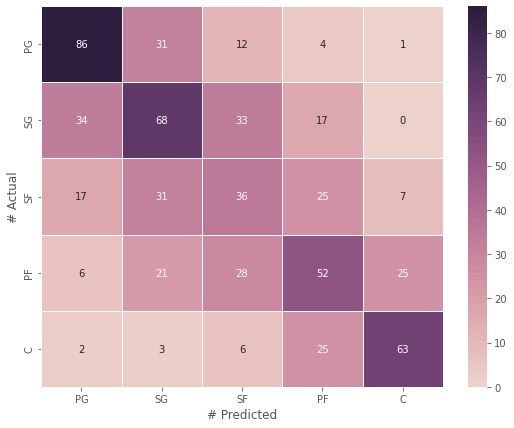

In [29]:
# Print confusion matrix using pre-defined function:
cm2 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy. We can see in the above, for instance, that out of the 134 point guards included in the Testing Dataset (86+31+12+4+1), the model correctly predicted "point guard" 86 times. 31 times it thought the point guard was a shooting guard, 12 times it thought the point guard was a small forward, 4 times it thought the point guard was a power forward, and 1 time it thought the point guard was a center. That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [30]:
# Print classification report:
dt2_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(dt2_class_report)

              precision    recall  f1-score   support

          PG       0.59      0.64      0.62       134
          SG       0.44      0.45      0.44       152
          SF       0.31      0.31      0.31       116
          PF       0.42      0.39      0.41       132
           C       0.66      0.64      0.65        99

    accuracy                           0.48       633
   macro avg       0.49      0.49      0.49       633
weighted avg       0.48      0.48      0.48       633



#### A Feature Importance table cannot be run on X-data that has been PCA transformed, as the original features no longer exist.

# Decision Tree Comparison:
### Compare Decision Tree Results (did PCA Transformation of the X-data improve or worsen model?)

In [31]:
print(f'Decision Tree 1 Accuracy Score (no PCA): {dt1_accuracy_score}. \nDecision Tree 2 Accuracy Score (with PCA): {dt2_accuracy_score}.')

Decision Tree 1 Accuracy Score (no PCA): 0.5924170616113744. 
Decision Tree 2 Accuracy Score (with PCA): 0.48183254344391785.


In [32]:
print(f'DT1 Class. Report (no PCA): {dt1_class_report}. \nDT2 Class. Report (with PCA): {dt2_class_report}.')

DT1 Class. Report (no PCA):               precision    recall  f1-score   support

          PG       0.77      0.77      0.77       134
          SG       0.58      0.55      0.57       152
          SF       0.38      0.43      0.40       116
          PF       0.52      0.49      0.51       132
           C       0.74      0.74      0.74        99

    accuracy                           0.59       633
   macro avg       0.60      0.60      0.60       633
weighted avg       0.60      0.59      0.59       633
. 
DT2 Class. Report (with PCA):               precision    recall  f1-score   support

          PG       0.59      0.64      0.62       134
          SG       0.44      0.45      0.44       152
          SF       0.31      0.31      0.31       116
          PF       0.42      0.39      0.41       132
           C       0.66      0.64      0.65        99

    accuracy                           0.48       633
   macro avg       0.49      0.49      0.49       633
weighted avg     

#### Based on the above results, it appears that the model without PCA transformation of X-data is a better model than the one with PCA transformation.
- 59.2% accuracy vs. 48.2% accuracy.
- 60% precision vs. 49% precision.
- 60% recall vs. 49% recall.
- 60% f1 score vs. 49% F1 score.

#### Therefore, in my third and final Decision Tree, I will not use PCA transformation.

# Decision Tree (3 of 3):
### This model will use the top 6 features, identified by Decision Tree 1's "Feature Importance" table, and based on the previous results, will not incorporate PCA transformation.

In [33]:
# First, remind ourselves what the first Decision Tree identified as the top 6 features:
dt1_importances.head(6)

Importance
TRB    0.234745
AST    0.187726
ORB    0.072603
BLK    0.044798
FT%    0.043533
PF     0.042900

#### Now, re-run the Decision Tree model without using PCA data transformation, only using these top 6 features, as opposed to the 20 features used in the previous two models:

In [34]:
# New clean dataframe:
df_decision_tree3 = df.copy()
df_decision_tree3 = df_decision_tree3[['TRB', 'AST', 'ORB', 'BLK', 'FT%', 'PF','Pos']]
df_decision_tree3.head()

TRB  AST  ORB  BLK   FT%   PF Pos
0    8.4  1.9  2.2  0.6  0.78  4.1  PF
2   10.6  1.3  4.0  1.7  0.50  4.5   C
4    3.6  1.9  0.4  0.1  0.84  2.4  SG
5    3.7  2.1  0.4  0.1  0.84  2.2  SG
10  10.4  1.8  2.5  1.0  0.84  1.8  PF

In [35]:
# Set X (features) and y (target):
X = df_decision_tree3.drop('Pos', axis=1)
y = df_decision_tree3.loc[:, 'Pos']

In [36]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    607
PG    535
PF    530
SF    464
C     396
Name: Pos, dtype: int64

In [37]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [38]:
# Split X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1899, 6)
y_train: (1899, 1)
X_test: (633, 6)
y_test: (633, 1)


In [39]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
# Create, fit, and predict Decision Tree Model:
dt3_model = tree.DecisionTreeClassifier(random_state=1)
dt3_model = dt3_model.fit(X_train_scaled, y_train)
predictions = dt3_model.predict(X_test_scaled)

In [41]:
# Print accuracy score:
dt3_accuracy_score = accuracy_score(y_test, predictions)
dt3_accuracy_score

0.5671406003159558

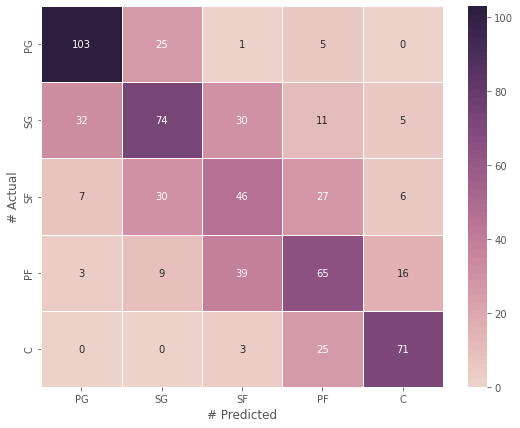

In [42]:
# Print confusion matrix using pre-defined function:
cm3 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy. We can see in the above, for instance, that out of the 134 point guards included in the Testing Dataset (103+25+1+5+0), the model correctly predicted "point guard" 103 times. 25 times it thought the point guard was a shooting guard, 1 times it thought the point guard was a small forward, 5 time it thought the point guard was a power forward, and 0 times it thought the point guard was a center. That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [43]:
# Print classification report:
dt3_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(dt3_class_report)

              precision    recall  f1-score   support

          PG       0.71      0.77      0.74       134
          SG       0.54      0.49      0.51       152
          SF       0.39      0.40      0.39       116
          PF       0.49      0.49      0.49       132
           C       0.72      0.72      0.72        99

    accuracy                           0.57       633
   macro avg       0.57      0.57      0.57       633
weighted avg       0.57      0.57      0.57       633



#### Compare the results of Decision Tree 3 to those of Decision Tree 1; did reducing features to the top 6 improve the model?

In [44]:
print(f'Decision Tree 1 Accuracy Score (all 20 features): {dt1_accuracy_score}. \nDecision Tree 3 Accuracy Score (top 6 features): {dt3_accuracy_score}.')

Decision Tree 1 Accuracy Score (all 20 features): 0.5924170616113744. 
Decision Tree 3 Accuracy Score (top 6 features): 0.5671406003159558.


In [45]:
print(f'DT1 Class. Report (all 20 features): {dt1_class_report}. \nDT3 Class. Report (top 6 features): {dt3_class_report}.')

DT1 Class. Report (all 20 features):               precision    recall  f1-score   support

          PG       0.77      0.77      0.77       134
          SG       0.58      0.55      0.57       152
          SF       0.38      0.43      0.40       116
          PF       0.52      0.49      0.51       132
           C       0.74      0.74      0.74        99

    accuracy                           0.59       633
   macro avg       0.60      0.60      0.60       633
weighted avg       0.60      0.59      0.59       633
. 
DT3 Class. Report (top 6 features):               precision    recall  f1-score   support

          PG       0.71      0.77      0.74       134
          SG       0.54      0.49      0.51       152
          SF       0.39      0.40      0.39       116
          PF       0.49      0.49      0.49       132
           C       0.72      0.72      0.72        99

    accuracy                           0.57       633
   macro avg       0.57      0.57      0.57       633
we

#### Based on the above results, it appears that the model that uses all 20 features is slightly better than the one that uses only the top 6:
- 59.2% accuracy vs. 56.7% accuracy.
- 60% precision vs. 57% precision.
- 60% recall vs. 57% recall.
- 60% F1 score vs. 57% F1 score.

# Final Decision Trees Conclusion:
### After running the three Decision Tree models, I achieved a max accuracy score of 59% - this model used all 20 features and did not undergo PCA transformation of X-data. So we have one model with a 59% accuracy score - let's try some other models and see if we can get it to increase.

# Random Forest (1 of 2):
### These models are more a bit more complex than Decision Trees and take it a step further - I expect better results. We will run each model twice - once using all 20 features, and next, using only the top 6 most important features deemed by the first model.
### This first Random Forest model will use all features.

In [46]:
# New clean dataframe:
df1_randomforest = df_decision_tree1.copy()
df1_randomforest.head()

PTS   TRB  ORB  AST  STL  BLK   FG   FGA   FG%   3P  3PA   3P%   2P  \
0   11.1   8.4  2.2  1.9  0.8  0.6  4.3   9.3  0.46  0.5  1.7  0.30  3.7   
2   10.9  10.6  4.0  1.3  0.8  1.7  4.4   8.1  0.54  0.0  0.0  0.00  4.4   
4   14.9   3.6  0.4  1.9  0.6  0.1  5.4  12.7  0.42  1.7  4.8  0.35  3.7   
5   15.9   3.7  0.4  2.1  0.7  0.1  5.8  13.5  0.43  1.7  5.0  0.34  4.1   
10  23.8  10.4  2.5  1.8  0.7  1.0  9.4  20.3  0.47  0.5  1.5  0.35  8.9   

     2PA   2P%   FT  FTA   FT%   PF  TOV Pos  
0    7.6  0.49  2.1  2.7  0.78  4.1  1.7  PF  
2    8.1  0.55  2.1  4.2  0.50  4.5  2.0   C  
4    7.9  0.47  2.4  2.8  0.84  2.4  1.7  SG  
5    8.5  0.48  2.6  3.1  0.84  2.2  1.7  SG  
10  18.8  0.48  4.4  5.2  0.84  1.8  1.7  PF

In [47]:
# Set X (features) and y (target):
X = df1_randomforest.drop('Pos', axis=1)
y = df1_randomforest.loc[:, 'Pos']

In [48]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    607
PG    535
PF    530
SF    464
C     396
Name: Pos, dtype: int64

In [49]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [50]:
# Split the X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1899, 20)
y_train: (1899, 1)
X_test: (633, 20)
y_test: (633, 1)


In [51]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [52]:
# Create, fit, and predict Random Forest Model:
rf1_model = RandomForestClassifier(n_estimators=500, random_state=1)
rf1_model = rf1_model.fit(X_train_scaled, y_train)
predictions = rf1_model.predict(X_test_scaled)

In [53]:
rf1_accuracy_score = accuracy_score(y_test, predictions)
rf1_accuracy_score

0.6919431279620853

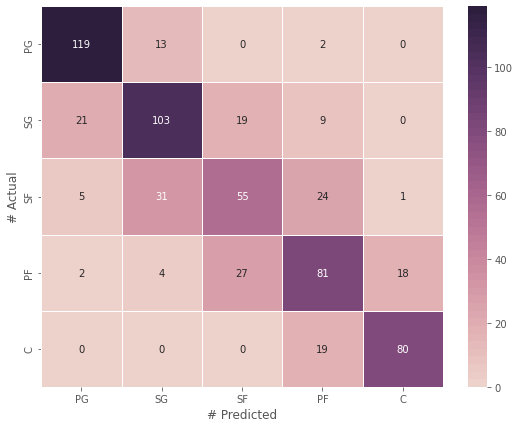

In [54]:
# Print confusion matrix using pre-defined function:
cm4 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy. We can see in the above, for instance, that out of the 134 point guards included in the Testing Dataset (119+13+0+2+0), the model correctly predicted "point guard" 119 times. 13 times it thought the point guard was a shooting guard, 0 times it thought the point guard was a small forward, 2 times it thought the point guard was a power forward, and 0 times it thought the point guard was a center. That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [55]:
# Print classification report:
rf1_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(rf1_class_report)

              precision    recall  f1-score   support

          PG       0.81      0.89      0.85       134
          SG       0.68      0.68      0.68       152
          SF       0.54      0.47      0.51       116
          PF       0.60      0.61      0.61       132
           C       0.81      0.81      0.81        99

    accuracy                           0.69       633
   macro avg       0.69      0.69      0.69       633
weighted avg       0.69      0.69      0.69       633



In [56]:
# List features ordered by feature importance:
rf1_importances = pd.DataFrame(rf1_model.feature_importances_, index = X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
rf1_importances

Importance
TRB    0.141277
AST    0.139954
ORB    0.086776
BLK    0.062695
3PA    0.047591
TOV    0.045068
STL    0.043079
FG%    0.039754
3P     0.038491
2P%    0.036157
PF     0.035638
2PA    0.035061
FGA    0.033519
2P     0.032528
PTS    0.031837
FT%    0.030454
FG     0.030298
FTA    0.030078
3P%    0.030038
FT     0.029708

#### We can see that Random Forest 1 deemed TRB, AST, ORB, BLK, 3PA, and TOV to be the most important features that help the model predict positions. It deemed PTS, FT%, FG, FTA, 3P% and FT to be the least important features. This makes sense - the categories in which average stats differ greatly position-by-position (like TRB and AST) the model deems to be important, while categories in which average stats do not differ greatly position-by-position (like FG and FT) the model deems to be unhelpful toward making predictions.

# Random Forest (2 of 2):
### This model will use the top 6 features, identified by Random Forest 1's "Feature Importance" table, rather than all 20 features.

In [57]:
# New clean dataframe:
df2_randomforest = df_decision_tree1.copy()
df2_randomforest = df2_randomforest[['TRB', 'AST', 'ORB', 'BLK', '3PA', 'TOV', 'Pos']]
df2_randomforest.head()

TRB  AST  ORB  BLK  3PA  TOV Pos
0    8.4  1.9  2.2  0.6  1.7  1.7  PF
2   10.6  1.3  4.0  1.7  0.0  2.0   C
4    3.6  1.9  0.4  0.1  4.8  1.7  SG
5    3.7  2.1  0.4  0.1  5.0  1.7  SG
10  10.4  1.8  2.5  1.0  1.5  1.7  PF

In [58]:
# Set X (features) and y (target):
X = df2_randomforest.drop('Pos', axis=1)
y = df2_randomforest.loc[:, 'Pos']

In [59]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    607
PG    535
PF    530
SF    464
C     396
Name: Pos, dtype: int64

In [60]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [61]:
# Split X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1899, 6)
y_train: (1899, 1)
X_test: (633, 6)
y_test: (633, 1)


In [62]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [63]:
# Create, fit, and predict Random Forest 2 Model:
rf2_model = RandomForestClassifier(n_estimators=500, random_state=1)
rf2_model = rf2_model.fit(X_train_scaled, y_train)
predictions = rf2_model.predict(X_test_scaled)

In [64]:
# Print accuracy score:
rf2_accuracy_score = accuracy_score(y_test, predictions)
rf2_accuracy_score

0.6619273301737757

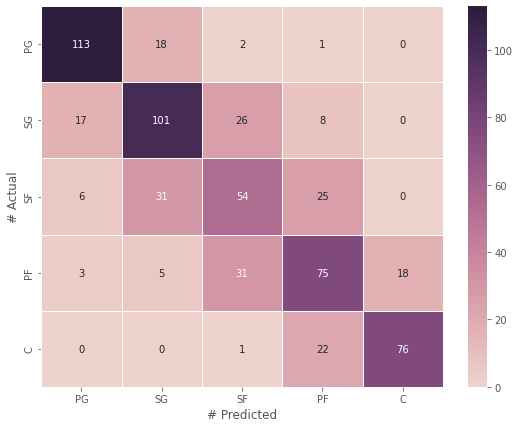

In [65]:
# Print confusion matrix using pre-defined function:
cm5 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy. We can see in the above, for instance, that out of the 134 point guards included in the Testing Dataset (113+18+2+1+0), the model correctly predicted "point guard" 113 times. 18 times it thought the point guard was a shooting guard, 2 times it thought the point guard was a small forward, 1 time it thought the point guard was a power forward, and 0 times it thought the point guard was a center. That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [66]:
# Print classification report:
rf2_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(rf2_class_report)

              precision    recall  f1-score   support

          PG       0.81      0.84      0.83       134
          SG       0.65      0.66      0.66       152
          SF       0.47      0.47      0.47       116
          PF       0.57      0.57      0.57       132
           C       0.81      0.77      0.79        99

    accuracy                           0.66       633
   macro avg       0.66      0.66      0.66       633
weighted avg       0.66      0.66      0.66       633



### Compare the results of Random Forest 1 to those of Random Forest 2; did reducing features to the top 6 improve the model?

In [67]:
print(f'Random Forest 1 Accuracy Score (all 20 features): {rf1_accuracy_score}. \nRandom Forest 2 Accuracy Score (top 6 features): {rf2_accuracy_score}.')

Random Forest 1 Accuracy Score (all 20 features): 0.6919431279620853. 
Random Forest 2 Accuracy Score (top 6 features): 0.6619273301737757.


In [68]:
print(f'RF1 Class. Report (all 20 features): {rf1_class_report}. \nRF2 Class. Report (top 6 features): {rf2_class_report}.')

RF1 Class. Report (all 20 features):               precision    recall  f1-score   support

          PG       0.81      0.89      0.85       134
          SG       0.68      0.68      0.68       152
          SF       0.54      0.47      0.51       116
          PF       0.60      0.61      0.61       132
           C       0.81      0.81      0.81        99

    accuracy                           0.69       633
   macro avg       0.69      0.69      0.69       633
weighted avg       0.69      0.69      0.69       633
. 
RF2 Class. Report (top 6 features):               precision    recall  f1-score   support

          PG       0.81      0.84      0.83       134
          SG       0.65      0.66      0.66       152
          SF       0.47      0.47      0.47       116
          PF       0.57      0.57      0.57       132
           C       0.81      0.77      0.79        99

    accuracy                           0.66       633
   macro avg       0.66      0.66      0.66       633
we

#### Based on the above results, it appears that the model that uses all 20 features is better than the one that uses only the top 6:
- 69.2% accuracy vs. 66.2% accuracy.
- 69% precision vs. 66% precision.
- 69% recall vs. 66% recall.
- 69% F1 score vs. 66% F1 score.

# Final Random Forest Conclusion:
### After running the two Random Forest models, I achieved a max accuracy score of 69% - this model used all 20 features. This is a marked improvement from the best Decision Tree accuracy score of 59%. Let's continue with some different models and see how those affect the model's performance.

# Support Vector Machine Model (SVM) (1 of 2):
### We will run each model twice - once using all 20 features, and next, using only the top 6 most important features deemed by the first model.
### This first SVM model will use all features.

In [69]:
# New clean dataframe:
df1_svm1 = df_decision_tree1.copy()
df1_svm1.head()

PTS   TRB  ORB  AST  STL  BLK   FG   FGA   FG%   3P  3PA   3P%   2P  \
0   11.1   8.4  2.2  1.9  0.8  0.6  4.3   9.3  0.46  0.5  1.7  0.30  3.7   
2   10.9  10.6  4.0  1.3  0.8  1.7  4.4   8.1  0.54  0.0  0.0  0.00  4.4   
4   14.9   3.6  0.4  1.9  0.6  0.1  5.4  12.7  0.42  1.7  4.8  0.35  3.7   
5   15.9   3.7  0.4  2.1  0.7  0.1  5.8  13.5  0.43  1.7  5.0  0.34  4.1   
10  23.8  10.4  2.5  1.8  0.7  1.0  9.4  20.3  0.47  0.5  1.5  0.35  8.9   

     2PA   2P%   FT  FTA   FT%   PF  TOV Pos  
0    7.6  0.49  2.1  2.7  0.78  4.1  1.7  PF  
2    8.1  0.55  2.1  4.2  0.50  4.5  2.0   C  
4    7.9  0.47  2.4  2.8  0.84  2.4  1.7  SG  
5    8.5  0.48  2.6  3.1  0.84  2.2  1.7  SG  
10  18.8  0.48  4.4  5.2  0.84  1.8  1.7  PF

In [70]:
# Set X (features) and y (target):
X = df1_svm1.drop('Pos', axis=1)
y = df1_svm1.loc[:, 'Pos']

In [71]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    607
PG    535
PF    530
SF    464
C     396
Name: Pos, dtype: int64

In [72]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [73]:
# Split the X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1899, 20)
y_train: (1899, 1)
X_test: (633, 20)
y_test: (633, 1)


In [74]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [75]:
# Create, fit, and predict Random Forest Model:
svm1_model = svm.SVC(kernel='linear', random_state=1)
svm1_model = svm1_model.fit(X_train_scaled, y_train)
predictions = svm1_model.predict(X_test_scaled)

In [76]:
svm1_accuracy_score = accuracy_score(y_test, predictions)
svm1_accuracy_score

0.6635071090047393

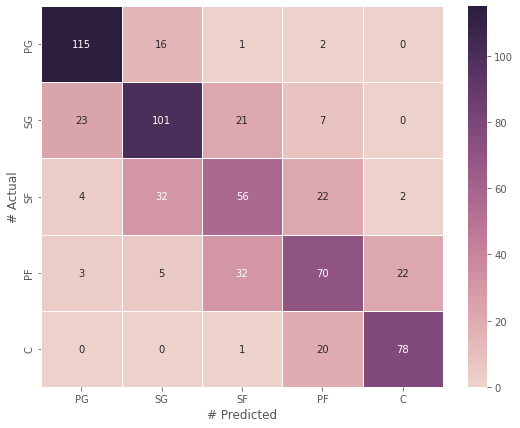

In [77]:
# Print confusion matrix using pre-defined function:
cm6 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy. We can see in the above, for instance, that out of the 134 point guards included in the Testing Dataset (115+16+1+2+0), the model correctly predicted "point guard" 115 times. 16 times it thought the point guard was a shooting guard, 1 time it thought the point guard was a small forward, 2 times it thought the point guard was a power forward, and 0 times it thought the point guard was a center. That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [78]:
# Print classification report:
svm1_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(svm1_class_report)

              precision    recall  f1-score   support

          PG       0.79      0.86      0.82       134
          SG       0.66      0.66      0.66       152
          SF       0.50      0.48      0.49       116
          PF       0.58      0.53      0.55       132
           C       0.76      0.79      0.78        99

    accuracy                           0.66       633
   macro avg       0.66      0.66      0.66       633
weighted avg       0.66      0.66      0.66       633



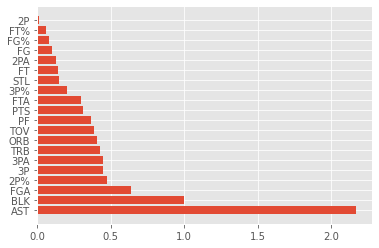

In [79]:
# Construct plot that displays Feature Importances (SVM Model does not have a simple Feature Importance list like Decision Trees and Random Forests):
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

feature_names = ['PTS', 'TRB', 'ORB', 'AST', 'STL', 'BLK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'TOV']
f_importances(abs(svm1_model.coef_[0]), feature_names)

#### We can see that SVM 1 deemed AST, BLK, FGA, 2P%, 3P and TRB to be the most important features (excluding redundant 3P) that help the model predict positions. It deemed 2P, FT%, FG%, FG, 2PA and FT to be the least important features. This makes sense - the categories in which average stats differ greatly position-by-position (like BLK and AST) the model deems to be important, while categories in which average stats do not differ greatly position-by-position (like FT) the model deems to be unhelpful toward making predictions.

# Support Vector Machine Model (SVM) (2 of 2):
### This model will use the top 6 features (excluding 3PA due to redundency), identified by SVM 1's "Feature Importance" chart, rather than all features.

In [80]:
# New clean dataframe:
df2_svm2 = df_decision_tree1.copy()
df2_svm2 = df2_svm2[['AST', 'BLK', 'FGA', '2P%', '3P', 'TRB', 'Pos']]
df2_svm2.head()

AST  BLK   FGA   2P%   3P   TRB Pos
0   1.9  0.6   9.3  0.49  0.5   8.4  PF
2   1.3  1.7   8.1  0.55  0.0  10.6   C
4   1.9  0.1  12.7  0.47  1.7   3.6  SG
5   2.1  0.1  13.5  0.48  1.7   3.7  SG
10  1.8  1.0  20.3  0.48  0.5  10.4  PF

In [81]:
# Set X (features) and y (target):
X = df2_svm2.drop('Pos', axis=1)
y = df2_svm2.loc[:, 'Pos']

In [82]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    607
PG    535
PF    530
SF    464
C     396
Name: Pos, dtype: int64

In [83]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [84]:
# Split X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1899, 6)
y_train: (1899, 1)
X_test: (633, 6)
y_test: (633, 1)


In [85]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [86]:
# Create, fit, and predict SVM 2 Model:
svm2_model = svm.SVC(kernel='linear', random_state=1)
svm2_model = svm2_model.fit(X_train_scaled, y_train)
predictions = svm2_model.predict(X_test_scaled)

In [87]:
# Print accuracy score:
svm2_accuracy_score = accuracy_score(y_test, predictions)
svm2_accuracy_score

0.6477093206951027

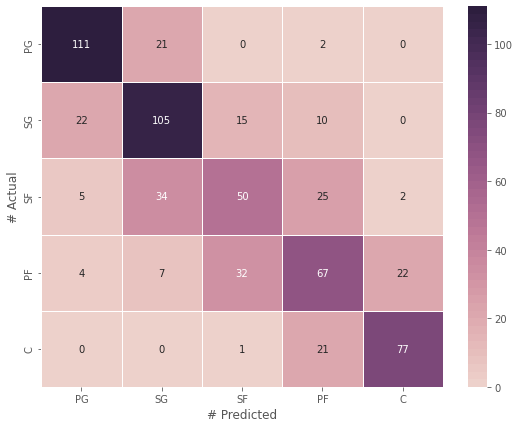

In [88]:
# Print confusion matrix using pre-defined function:
cm7 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy. We can see in the above, for instance, that out of the 134 point guards included in the Testing Dataset (111+21+0+2+0), the model correctly predicted "point guard" 111 times. 21 times it thought the point guard was a shooting guard, 0 times it thought the point guard was a small forward, 2 times it thought the point guard was a power forward, and 0 times it thought the point guard was a center. That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [89]:
# Print classification report:
svm2_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(svm2_class_report)

              precision    recall  f1-score   support

          PG       0.78      0.83      0.80       134
          SG       0.63      0.69      0.66       152
          SF       0.51      0.43      0.47       116
          PF       0.54      0.51      0.52       132
           C       0.76      0.78      0.77        99

    accuracy                           0.65       633
   macro avg       0.64      0.65      0.64       633
weighted avg       0.64      0.65      0.64       633



### Compare the results of SVM 1 to those of SVM 2; did reducing features to the top 6 improve the model?

In [90]:
print(f'SVM 1 Accuracy Score (all 20 features): {svm1_accuracy_score}. \nSVM 2 Accuracy Score (top 6 features): {svm2_accuracy_score}.')

SVM 1 Accuracy Score (all 20 features): 0.6635071090047393. 
SVM 2 Accuracy Score (top 6 features): 0.6477093206951027.


In [91]:
print(f'SVM1 Class. Report (all 20 features): {svm1_class_report}. \nSVM2 Class. Report (top 6 features): {svm2_class_report}.')

SVM1 Class. Report (all 20 features):               precision    recall  f1-score   support

          PG       0.79      0.86      0.82       134
          SG       0.66      0.66      0.66       152
          SF       0.50      0.48      0.49       116
          PF       0.58      0.53      0.55       132
           C       0.76      0.79      0.78        99

    accuracy                           0.66       633
   macro avg       0.66      0.66      0.66       633
weighted avg       0.66      0.66      0.66       633
. 
SVM2 Class. Report (top 6 features):               precision    recall  f1-score   support

          PG       0.78      0.83      0.80       134
          SG       0.63      0.69      0.66       152
          SF       0.51      0.43      0.47       116
          PF       0.54      0.51      0.52       132
           C       0.76      0.78      0.77        99

    accuracy                           0.65       633
   macro avg       0.64      0.65      0.64       633


#### Based on the above results, it appears that the model that uses all 20 features is slightly better than the one that uses only the top 6:
- 66.4% accuracy vs. 64.8% accuracy.
- 66% precision vs. 64% precision.
- 66% recall vs. 65% recall.
- 66% f1 score vs. 64% f1 score.

# Final Support Vector Machine (SVM) Conclusion:
### After running the two SVM models, I achieved a max accuracy score of 66% - this model used all 20 features. This is a slight decrease from the 69% accuracy of Random Forest 1 model, but is still good. Let's continue with one more model and see if it improves.

# Gradient Boosted Trees (1 of 2):
### We will run each model twice - once using all 20 features, and next, using only the top 5 most important features deemed by the first model.
### This first GBT model will use all features.

In [92]:
# New clean dataframe:
df1_gbt1 = df_decision_tree1.copy()

In [93]:
# Set X (features) and y (target):
X = df1_gbt1.drop('Pos', axis=1)
y = df1_gbt1.loc[:, 'Pos']

In [94]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    607
PG    535
PF    530
SF    464
C     396
Name: Pos, dtype: int64

In [95]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [96]:
# Split the X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1899, 20)
y_train: (1899, 1)
X_test: (633, 20)
y_test: (633, 1)


In [97]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [98]:
# Initial Import:
from sklearn.ensemble import GradientBoostingClassifier

# Before creating Gradient Boosting Tree Model, determine best learning_rate to use in model:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gbt1_model = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=5, max_depth=3, random_state=0)

    # Fit the model
    gbt1_model.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        gbt1_model.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        gbt1_model.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.705
Accuracy score (validation): 0.621

Learning rate:  0.1
Accuracy score (training): 0.754
Accuracy score (validation): 0.645

Learning rate:  0.25
Accuracy score (training): 0.804
Accuracy score (validation): 0.660

Learning rate:  0.5
Accuracy score (training): 0.868
Accuracy score (validation): 0.652

Learning rate:  0.75
Accuracy score (training): 0.908
Accuracy score (validation): 0.646

Learning rate:  1
Accuracy score (training): 0.930
Accuracy score (validation): 0.621



#### Based on the above Learning Rates, it looks like Learning Rate 0.75 is best, as it leads to the highest overall accuracy scores for the training and the testing datasets.

In [99]:
# Create, fit, and predict Gradient Boosted Tree Model:
gbt1_model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_depth=3, random_state=1)
gbt1_model = gbt1_model.fit(X_train_scaled, y_train)
predictions = gbt1_model.predict(X_test_scaled)

In [100]:
gbt1_accuracy_score = accuracy_score(y_test, predictions)
gbt1_accuracy_score

0.636650868878357

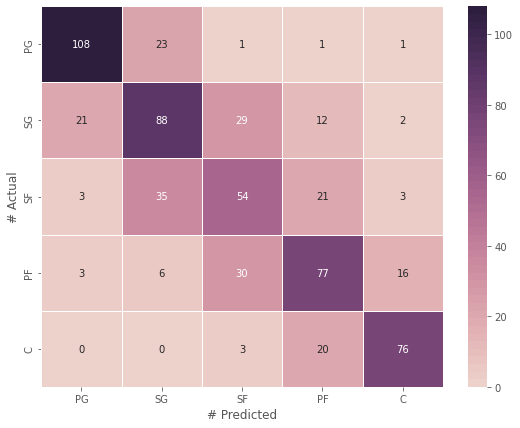

In [101]:
# Print confusion matrix using pre-defined function:
cm8 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy. We can see in the above, for instance, that out of the 134 point guards included in the Testing Dataset (108+23+1+1+1), the model correctly predicted "point guard" 108 times. 23 times it thought the point guard was a shooting guard, 1 time it thought the point guard was a small forward, 1 time it thought the point guard was a power forward, and 1 time it thought the point guard was a center. That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [102]:
# Print classification report:
gbt1_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(gbt1_class_report)

              precision    recall  f1-score   support

          PG       0.80      0.81      0.80       134
          SG       0.58      0.58      0.58       152
          SF       0.46      0.47      0.46       116
          PF       0.59      0.58      0.59       132
           C       0.78      0.77      0.77        99

    accuracy                           0.64       633
   macro avg       0.64      0.64      0.64       633
weighted avg       0.64      0.64      0.64       633



In [103]:
# List features ordered by feature importance:
gbt1_importances = pd.DataFrame(gbt1_model.feature_importances_, index = X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
gbt1_importances

Importance
AST    0.271894
TRB    0.267471
ORB    0.137947
BLK    0.042325
STL    0.038466
FG%    0.026311
2P%    0.023594
FT%    0.022192
2PA    0.021331
PF     0.019171
FGA    0.018803
3PA    0.016932
TOV    0.016423
PTS    0.013491
FT     0.011586
FG     0.011287
FTA    0.011215
3P%    0.010730
2P     0.010302
3P     0.008527

#### We can see that Gradient Boosted Tree 1 deemed AST, TRB, ORB, BLK, and STL to be the most important features that help the model predict positions. It deemed FT, FG, FTA, 3P%, 2P and 3P to be the least important features. This makes sense - the categories in which average stats differ greatly position-by-position (like TRB and AST) the model deems to be important, while categories in which average stats do not differ greatly position-by-position (like FT and FG) the model deems to be unhelpful toward making predictions.

# Gradient Boosted Trees (2 of 2):
### This model will use the top 5 features, identified by GBT 1's "Feature Importance" chart, rather than all features.

In [104]:
# New clean dataframe:
df2_gbt2 = df_decision_tree1.copy()
df2_gbt2 = df2_gbt2[['AST', 'TRB', 'ORB', 'BLK', 'STL', 'Pos']]
df2_gbt2.head()

AST   TRB  ORB  BLK  STL Pos
0   1.9   8.4  2.2  0.6  0.8  PF
2   1.3  10.6  4.0  1.7  0.8   C
4   1.9   3.6  0.4  0.1  0.6  SG
5   2.1   3.7  0.4  0.1  0.7  SG
10  1.8  10.4  2.5  1.0  0.7  PF

In [105]:
# Set X (features) and y (target):
X = df2_gbt2.drop('Pos', axis=1)
y = df2_gbt2.loc[:, 'Pos']

In [106]:
# Check how many of each position in y-dataset:
y.value_counts()

SG    607
PG    535
PF    530
SF    464
C     396
Name: Pos, dtype: int64

In [107]:
# Apply position_dictionary established in Decision Tree 1 to this model:
y = y.map(position_dictionary).values.reshape(-1,1)

In [108]:
# Split X and y into X_train, X_test, y_train, y_test and check shape of each:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1899, 5)
y_train: (1899, 1)
X_test: (633, 5)
y_test: (633, 1)


In [109]:
# Scale X-data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [110]:
# Create, fit, and predict Gradient Boosted Tree Model:
gbt2_model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_depth=3, random_state=1)
gbt2_model = gbt2_model.fit(X_train_scaled, y_train)
predictions = gbt2_model.predict(X_test_scaled)

In [111]:
# Print accuracy score:
gbt2_accuracy_score = accuracy_score(y_test, predictions)
gbt2_accuracy_score

0.6129541864139021

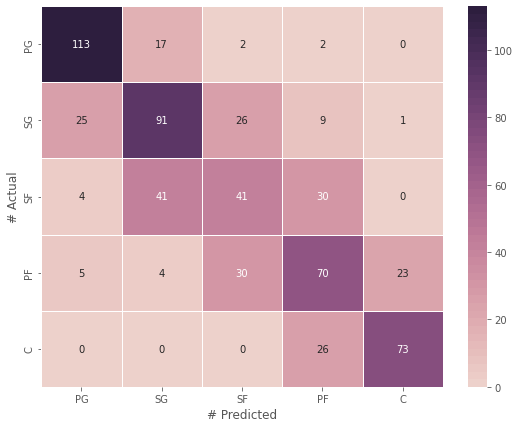

In [112]:
# Print confusion matrix using pre-defined function:  
cm9 = confusion_matrix_heatmap(y_test, predictions)

#### The confusion matrix is a helpful way to visualize the model's accuracy. We can see in the above, for instance, that out of the 134 point guards included in the Testing Dataset (113+17+2+2+0), the model correctly predicted "point guard" 113 times. 17 times it thought the point guard was a shooting guard, 2 times it thought the point guard was a small forward, 2 times it thought the point guard was a power forward, and 0 times it thought the point guard was a center. That distribution makes sense - as the differing responsibilities of the positions increased, the model was less likely to predict that the point guard was that position.

In [113]:
# Print classification report:
gbt2_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(gbt2_class_report)

              precision    recall  f1-score   support

          PG       0.77      0.84      0.80       134
          SG       0.59      0.60      0.60       152
          SF       0.41      0.35      0.38       116
          PF       0.51      0.53      0.52       132
           C       0.75      0.74      0.74        99

    accuracy                           0.61       633
   macro avg       0.61      0.61      0.61       633
weighted avg       0.61      0.61      0.61       633



### Compare the results of Gradient Boosted Tree 1 to those of Gradient Boosted Tree 2; did reducing features to the top 5 improve the model?

In [114]:
print(f'GBT 1 Accuracy Score (all 20 features): {gbt1_accuracy_score}. \nGBT 2 Accuracy Score (top 5 features): {gbt2_accuracy_score}.')

GBT 1 Accuracy Score (all 20 features): 0.636650868878357. 
GBT 2 Accuracy Score (top 5 features): 0.6129541864139021.


In [115]:
print(f'GBT1 Class. Report (all 20 features): {gbt1_class_report}. \nGBT2 Class. Report (top 5 features): {gbt2_class_report}.')

GBT1 Class. Report (all 20 features):               precision    recall  f1-score   support

          PG       0.80      0.81      0.80       134
          SG       0.58      0.58      0.58       152
          SF       0.46      0.47      0.46       116
          PF       0.59      0.58      0.59       132
           C       0.78      0.77      0.77        99

    accuracy                           0.64       633
   macro avg       0.64      0.64      0.64       633
weighted avg       0.64      0.64      0.64       633
. 
GBT2 Class. Report (top 5 features):               precision    recall  f1-score   support

          PG       0.77      0.84      0.80       134
          SG       0.59      0.60      0.60       152
          SF       0.41      0.35      0.38       116
          PF       0.51      0.53      0.52       132
           C       0.75      0.74      0.74        99

    accuracy                           0.61       633
   macro avg       0.61      0.61      0.61       633


#### Based on the above results, it appears that the model that uses all 20 features is slightly better than the one that uses only the top 5:
- 63.7% accuracy vs. 61.3% accuracy.
- 64% precision vs. 61% precision.
- 64% recall vs. 61% recall.
- 64% f1 score vs. 61% f1 score.

# Final Gradient Boosted Trees (GBTs) Conclusion:
### After running the two GBT models, I achieved a max accuracy score of 64% - this model used all 20 features. This is a decrease from the 69% accuracy of Random Forest 1 model.

# Final Conclusion:
#### Best Accuracy Score: Random Forest 1 model: 69.2%
#### Best Classification Report Scores: Random Forest 1 model: 69% precision, 69% recall, 69% F1 score
#### Best Overall Model: Random Forest 1 model

### Let's use the best model (Random Forest 1) and give it specific predictions, feeding it real stats of real players, and see how it classifies each player. We will use players who define their position well, which the model should correctly predict, along with players who play a more fluid game, a more "positionless" game, in which their skill-set is not confined to the traditional responsibilities of the position.
### Select Specific Players/Rows:

In [116]:
# Select players who define their position well:
pg_steph_row = original_df.loc[((original_df['Player'] == 'Stephen Curry') & (original_df['Age'] == 26))]
sg_beal_row = original_df.loc[((original_df['Player'] == 'Bradley Beal') & (original_df['Age'] == 24))]
sf_kawhi_row = original_df.loc[((original_df['Player'] == 'Kawhi Leonard') & (original_df['Age'] == 25))]
pf_love_row = original_df.loc[((original_df['Player'] == 'Kevin Love') & (original_df['Age'] == 27))]
c_embiid_row = original_df.loc[((original_df['Player'] == 'Joel Embiid') & (original_df['Age'] == 24))]

# Concatenate above into one dataframe:
position_players_df = pd.concat([pg_steph_row, sg_beal_row, sf_kawhi_row, pf_love_row, c_embiid_row], axis='rows', join='inner')

# Drop/Re-order columns to mimic Random Forest 1's dataset:
position_players_df = position_players_df[['PTS', 'TRB', 'ORB', 'AST', 'STL', 'BLK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'TOV']]

# Scale data (model data was scaled, so this data needs to be scaled as well):
position_players_df_scaled = scaler.fit_transform(position_players_df)

In [117]:
# Select players who play a more "positionless" game, in which their stats are not confined to the traditional responsibilities of their position:
pg_simmons_row = original_df.loc[((original_df['Player'] == 'Ben Simmons') & (original_df['Age'] == 22))]
pg_westbrook_row = original_df.loc[((original_df['Player'] == 'Russell Westbrook') & (original_df['Age'] == 24))]
sg_harden_row = original_df.loc[((original_df['Player'] == 'James Harden') & (original_df['Age'] == 26))]
pf_lebron_row = original_df.loc[((original_df['Player'] == 'LeBron James') & (original_df['Age'] == 33))]
pf_draymond_row = original_df.loc[((original_df['Player'] == 'Draymond Green') & (original_df['Age'] == 27))]
pf_giannis_row = original_df.loc[((original_df['Player'] == 'Giannis Antetokounmpo') & (original_df['Age'] == 23))]
c_davis_row = original_df.loc[((original_df['Player'] == 'Anthony Davis') & (original_df['Age'] == 26))]

# Concatenate above into one dataframe:
positionless_players_df = pd.concat([pg_simmons_row, pg_westbrook_row, sg_harden_row, pf_lebron_row, pf_draymond_row, pf_giannis_row, c_davis_row], axis='rows', join='inner')

# Drop/Re-order columns to mimic Random Forest 1's dataset:
positionless_players_df = positionless_players_df[['PTS', 'TRB', 'ORB', 'AST', 'STL', 'BLK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'TOV']]

# Scale data (model data was scaled, so this data needs to be scaled as well):
positionless_players_df_scaled = scaler.fit_transform(positionless_players_df)

In [118]:
# Predict first dataframe, containing players who define their position well:
# A PG, SG, SF, PF, then C were loaded in.  Therefore, this output should be 1, 2, 3, 4, 5.
# Also keep in mind order of players: PG Curry, SG Beal, SF Leonard, PF Love, C Embiid.
position_predictions = rf1_model.predict(position_players_df_scaled)
position_predictions

array([1, 2, 3, 4, 5], dtype=int64)

### The Random Forest 1 model correctly predicted all 5 positions, as we expected it to because these players define their position well. Now, let's feed in the second dataframe, containing players who defy traditional position responsibilities. I expect that the model will not successfully identify these players. However, that is where the insight lays - what position does the model think the player plays?

In [119]:
# Predict second dataframe, containing players who play a more "positionless" game:
# A PG, PG, SG, PF, PF, PF, and C were loaded in.  Therefore, this output should be 1, 1, 2, 4, 4, 4, 5.
# Also keep in mind order of players: PG Simmons, PG Westbrook, SG Harden, PF LeBron, PF Draymond, PF Giannis, C Gasol.
positionless_predictions = rf1_model.predict(positionless_players_df_scaled)
positionless_predictions

array([4, 2, 1, 1, 4, 4], dtype=int64)

#### The Random Forest 1 model correctly predicted 3 of the 7 positions: it correctly predicted James Harden as a SG, Draymond Green as a PF, and Giannis Antetokounmpo as a PF.
#### However, it thought PG Ben Simmons was a PF, PG Westbrook was a SG, PF LeBron James was a SF and C Marc Gasol was a PF.
#### For a center to be mistaken for a power forward, and vice-versa, or for a point guard to be mistaken for a shooting guard, and vice-versa, is not an egregious error. These positions are similar and share similar responsibilities, and oftentimes, these players do in fact play both positions over the course of a season, or even at different points in the same game. The most interesting finding here is the one relating to PG Ben Simmons: the model thought he was a PF. This is something I expected to, and am glad to, see. Ben Simmons is 6'10", which is very tall for a point guard. He is also a notoriously bad shooter for his position, rarely shooting from the outside, and mostly missing when he does. Therefore, his stats are more similar to those of power forwards, grabbing rebounds and shooting poorly from the outside. This is why the model thought he was a power forward.

### Try it yourself! Feed the model hypothetical stats, and see what position it predicts! Keep in mind: stats are per 36 minutes, not per game.

In [120]:
# Create custom dataframe of hypothetical stats:
my_stats_dict = {
        'PTS': 20,
        'TRB': 1,
        'ORB': 0,
        'AST': 10,
        'STL': 2,
        'BLK': 0,
        'FG': 7,
        'FGA': 17,
        'FG%': 0.43,
        '3P': 3,
        '3PA': 8,
        '3P%': 0.40,
        '2P': 3,
        '2PA': 9,
        '2P%': 0.46,
        'FT': 8,
        'FTA': 5,
        'FT%': 0.92,
        'PF': 3,
        'TOV': 3}
index = range(1)
my_stats_df = pd.DataFrame(my_stats_dict, index=index)

# Manually scale each column using a for-loop (cannot use Standard Scaler for only 1 prediction, only 1 row of data):
columns = ['PTS', 'TRB', 'ORB', 'AST', 'STL', 'BLK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'TOV']
for item in columns:
    my_stats_df[item] = (my_stats_df[item] - df[item].mean())/df[item].std()

In [121]:
# Make Prediction:
# Keep in mind: PG = 1.  SG = 2.  SF = 3.  PF = 4.  C = 5.
my_prediction = rf1_model.predict(my_stats_df)
my_prediction

array([1], dtype=int64)

# Ways to improve model:
#### The first, and most obvious, way to improve the model would be to use a larger dataset; my dataset contained 15 seasons and 4051 rows of data (after filtering), which is not small, but a larger dataset with more training/testing data could have benefitted. Another way to improve the models' accuracy would be to filter the dataframe even further: I only included players with at least 820 minutes played in the season (10 min/game * 82 games), which I felt was a good number to use because it filtered out rarely-used players while still keeping a good amount of the data. Using a higher threshold of minutes played would ensure that the players included in the dataset are truly representative of that position's output.

#### I also think a key feature was missing from the original dataset: the player's height. This is a huge factor in determining one's position, and I believe if that feature was included in the original dataset, it would have been deemed by the models as one of the most important feautures and would have ultimately increased accuracy scores across the board. More robust feature engineering in general would serve this dataset well.

#### In addition, today's NBA is becoming increasingly more "positionless". Players' skill-sets are much more thorough and comprehensive than they used to be - back in the day, centers typically did not shoot three pointers and point guards did not grab many rebounds. But in today's game, one's "position" on paper does not mean all that much; players have a variety of skills, and like we saw above in Random Forest 1's predictions, it is not so easy to predict positions anymore in the NBA. Using seasons from many years ago, much older than 15 years - when the game was more rigid than it is today and players mainly stuck to the traditional responsibilities of their respective position - would make it easier for the model to make predictions. A next step could be to use another Random Forest model using the same 20 features, but this time, use a different dataset, one containing NBA data from, say, 1980-1990, and see how accurate the model is compared to the model's accuracy using more current NBA data.